In [31]:
from gsmmutils import ModelValidator, MyModel
import gsmmutils
gsmmutils.model.model_validator.DATA_PATH =  "../results"
import seaborn as sns
from gsmmutils import DATA_PATH
gsmmutils.DATA_PATH = r"C:\Users\Bisbii\PythonProjects\GSMMutils\data"
from os.path import join
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(35,8.27)})

In [68]:
ng = MyModel(join(DATA_PATH, 'models/model_ng.xml'), 'e_Biomass__cytop')
ng.set_prism_reaction("PRISM_solar_litho__extr")
print(ng.slim_optimize())
ds = MyModel(join(DATA_PATH, 'models/model_ds.xml'), 'e_Biomass__cytop')
ds.set_prism_reaction("PRISM_white_LED__extr")
print(ds.slim_optimize())
pl = MyModel(join(DATA_PATH, 'models/model_pl.xml'), 'e_Biomass__cytop')
pl.set_prism_reaction("PRISM_fluorescent_cool_215W__extr")
print(pl.slim_optimize())

Loading

Reactions: 4498
Metabolites: 3809
Genes: 1332
Model loaded
0.021383004132942418
Loading

Reactions: 4516
Metabolites: 3672
Genes: 1696
Model loaded
0.19376008818033855
Loading

Reactions: 4771
Metabolites: 4216
Genes: 1350
Model loaded
0.13531697467297749


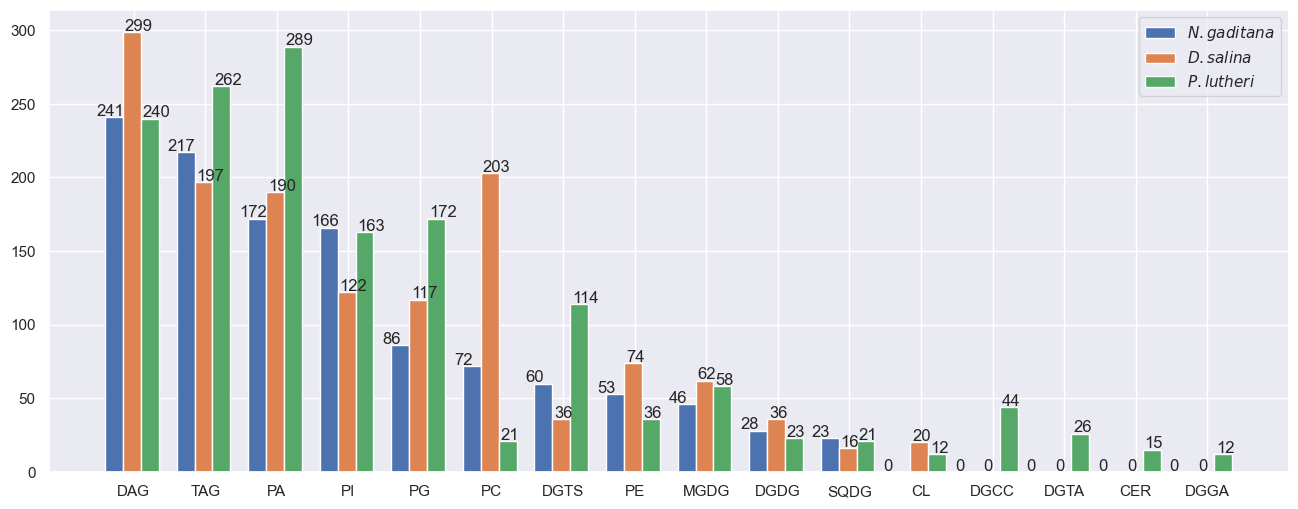

In [69]:
lipids_ng = {k: len(v) for k, v in ng.pathway_reactions_map.items() if k.startswith("BOIMMG")}
lipids_ds = {k: len(v) for k, v in ds.pathway_reactions_map.items() if k.startswith("BOIMMG")}
lipids_pl = {k: len(v) for k, v in pl.pathway_reactions_map.items() if k.startswith("BOIMMG")}
lipids = {k: (lipids_ng.get(k, 0), lipids_ds.get(k, 0), lipids_pl.get(k, 0)) for k in set(lipids_ng.keys()).union(set(lipids_ds.keys())).union(set(lipids_pl.keys()))}
from collections import OrderedDict
ordered_dict = OrderedDict(sorted(lipids.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(16, 6))
width = 0.25
x = range(len(ordered_dict))
plt.bar(x, [v[0] for v in ordered_dict.values()], width, label=r"$\it{N. gaditana}$")
plt.bar([i + width for i in x], [v[1] for v in ordered_dict.values()], width, label=r"$\it{D. salina}$")
plt.bar([i + width * 2 for i in x], [v[2] for v in ordered_dict.values()], width, label=r"$\it{P. lutheri}$")
plt.xticks([i + width / 2 for i in x], ordered_dict.keys(), rotation=90)
plt.legend()
for i, v in enumerate(ordered_dict.values()):
    plt.text(i - 0.25, v[0] + 1, str(v[0]))
    plt.text(i + width - 0.1, v[1] + 1, str(v[1]))
    plt.text(i + width * 2 - 0.1, v[2] + 1, str(v[2]))
    
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels = [label.replace('BOIMMG (', '') for label in labels]
labels = [label.replace(')', '') for label in labels]
x_ticks_positions = plt.gca().get_xticks()
x_ticks_positions = [e+0.15 for e in x_ticks_positions]
plt.gca().set_xticks(x_ticks_positions, labels, rotation=0)
plt.savefig("../results/figures/reactions_per_lipid_pathway.png")

In [65]:
counter_per_ec = {}
for reaction in ng.pathway_reactions_map['BOIMMG (PA)']:
    if isinstance(ng.reactions.get_by_id(reaction).annotation.get("ec-code", ""), str):
        if ng.reactions.get_by_id(reaction).annotation.get("ec-code", "") in counter_per_ec:
            counter_per_ec[ng.reactions.get_by_id(reaction).annotation.get("ec-code", "")] += 1
        else:
            counter_per_ec[ng.reactions.get_by_id(reaction).annotation.get("ec-code", "")] = 1
    if ng.reactions.get_by_id(reaction).annotation.get("ec-code", "") == "":
            print(reaction)

BMGR6316__er
BMGR6240__chlo
BMGR6305__er
BMGR6383__er
BMGR6372__er
BMGR6314__er
BMGR6373__er
BMGR6307__er
BMGR6302__er
BMGR6387__er


In [61]:
counter_per_ec_pl = {}
for reaction in pl.pathway_reactions_map['BOIMMG (PA)']:
    if isinstance(pl.reactions.get_by_id(reaction).annotation.get("ec-code", ""), str):
        if pl.reactions.get_by_id(reaction).annotation.get("ec-code", "") in counter_per_ec_pl:
            counter_per_ec_pl[pl.reactions.get_by_id(reaction).annotation.get("ec-code", "")] += 1
        else:
            counter_per_ec_pl[pl.reactions.get_by_id(reaction).annotation.get("ec-code", "")] = 1
    
            
counter_per_ec_ds = {}
for reaction in ds.pathway_reactions_map['BOIMMG (PA)']:
    if isinstance(ds.reactions.get_by_id(reaction).annotation.get("ec-code", ""), str):
        if ds.reactions.get_by_id(reaction).annotation.get("ec-code", "") in counter_per_ec_ds:
            counter_per_ec_ds[ds.reactions.get_by_id(reaction).annotation.get("ec-code", "")] += 1
        else:
            counter_per_ec_ds[ds.reactions.get_by_id(reaction).annotation.get("ec-code", "")] = 1
    

KeyError: 'BMGR6265__chlo'

In [59]:
counter_per_ec_ds

{'2.3.1.51': 118,
 '1.14.19.23': 14,
 '1.14.19.31': 12,
 '2.3.1.15': 29,
 '1.14.19.42': 8,
 '1.14.19.6': 3,
 '3.1.3.4': 2,
 '1.14.19.47': 3,
 '1.14.19.35': 1,
 '1.14.19.22': 1}

In [55]:
counter_per_ec

{'2.3.1.51': 86,
 '2.3.1.15': 21,
 '': 20,
 '1.14.19.47': 5,
 '1.14.19.22': 7,
 '1.14.19.45': 4,
 '1.14.19.6': 1,
 '2.3.1.20': 1,
 '1.14.19.25': 1}

In [49]:
counter_per_ec_pl

{'2.3.1.51': 200,
 '2.3.1.15': 60,
 '1.14.19.47': 7,
 '1.14.19.31': 2,
 '3.1.3.106': 12,
 '3.1.1.23': 2,
 '1.14.19.30': 3,
 '1.14.19.36': 1,
 '1.14.19.23': 1}

In [52]:
for reaction in pl.pathway_reactions_map['BOIMMG (PA)']:
    if "2.3.1.15" in pl.reactions.get_by_id(reaction).annotation.get("ec-code", ""):
        print(reaction, pl.reactions.get_by_id(reaction).name)

BMGR6461__chlo 10-cis-heptadecenoyl-CoA + sn-Glycerol 3-phosphate => 1-(10Z-heptadecenoyl)-sn-glycero-3-phosphate + CoA
BMGR6461__er 10-cis-heptadecenoyl-CoA + sn-Glycerol 3-phosphate => 1-(10Z-heptadecenoyl)-sn-glycero-3-phosphate + CoA
BMGR6154__mito (5Z,8Z,11Z,14Z,17Z)-Icosapentaenoyl-CoA + sn-Glycerol 3-phosphate => 1-(5Z,8Z,11Z,14Z,17Z-eicosapentaenoyl)-sn-glycero-3-phosphate + CoA
BMGR6154__chlo (5Z,8Z,11Z,14Z,17Z)-Icosapentaenoyl-CoA + sn-Glycerol 3-phosphate => 1-(5Z,8Z,11Z,14Z,17Z-eicosapentaenoyl)-sn-glycero-3-phosphate + CoA
BMGR6154__er (5Z,8Z,11Z,14Z,17Z)-Icosapentaenoyl-CoA + sn-Glycerol 3-phosphate => 1-(5Z,8Z,11Z,14Z,17Z-eicosapentaenoyl)-sn-glycero-3-phosphate + CoA
BMGR6411__mito (6Z,9Z,12Z,15Z)-Octadecatetraenoyl-CoA + sn-Glycerol 3-phosphate => 1-(6Z,9Z,12Z,15Z-octadecatetraenoyl)-sn-glycero-3-phosphate + CoA
BMGR6426__chlo sn-Glycerol 3-phosphate + ACYL-COA (19:1(9Z))  => 1-(9Z-nonadecenoyl)-glycero-3-phosphate  + CoA
BMGR6411__chlo (6Z,9Z,12Z,15Z)-Octadecatetraeno